<a href="https://colab.research.google.com/github/mpwellen/Artificial_Intelligence/blob/master/Data602_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project, we receive a data set called the employee_departure_data set. This data set contained a number of columns describing employees. We wished to analyze this data to determine whether or not an employee leaving the company can be predicted using a model. To this end, we first extracted new columns that better captured the data. We next analyzed the data using logistic regression, a decision tree, and a random forest model.

Ultimately, we found the best correlation with people leaving from the following variables.

Salary_diff: A low difference between previous salary and current salary correlated with employees leaving.

Boss-Employee Eval Discrepancy: A low discrepancy between boss and employees evaluations was correlated with employees staying.

Annual Raise: A high salary increase was associated with people staying.

Based on these results, we predict that paying current employees more will increase retention, and also that better tracking how employees think they are performing will help.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('employee_departure_dataset.csv')
print(df.head())
print("Is n/a: ", str(df.isna().sum()))
print(df.dropna(inplace=True))
df.info()
df.describe()

   Unnamed: 0  RecordId  Gender  Distance  YearsWorked  TrainingHours  \
0           0   1002332       1  >30miles            8             45   
1           1   1002333       0  ~10miles            7             73   
2           2   1002334       0    <5mile            6             65   
3           3   1002335       0  ~15miles            7             18   
4           4   1002336       1  ~20miles            7             73   

   WorkLifeBalance  NumOfProjects  JobInvolvement  TeamSize  ...  \
0                1             18               3        10  ...   
1                5              7               5        19  ...   
2                1             13               2         7  ...   
3                4             14               3         3  ...   
4                5             10               1        18  ...   

   WorkSatisfactionScore  JobEngagementScore  PhysicalActivityScore  \
0                      1                   5                      3   
1         

,Unnamed: 0,RecordId,Gender,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,SkillDevelopmentCourses,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,SelfReview,SupervisorReview,DepartmentCode,Left
count,298564.000000,2.985640e+05,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,...,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000,298564.000000
mean,150020.520716,1.152353e+06,0.400876,6.999236,49.561823,2.997176,10.016017,3.001822,9.999973,0.498265,...,0.500636,3.002750,4.994463,4.997364,4.997428,4.995529,4.399047,4.101442,3.997233,0.309679
std,86602.579193,8.660258e+04,0.490077,1.871442,28.817298,1.414920,5.484986,1.413867,5.472523,0.499998,...,0.500000,1.413139,2.579803,2.578987,2.582230,2.581681,0.663361,0.943873,2.161059,0.462362
min,0.000000,1.002332e+06,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000
25%,75032.750000,1.077365e+06,0.000000,6.000000,25.000000,2.000000,5.000000,2.000000,5.000000,0.000000,...,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,0.000000
50%,150030.500000,1.152362e+06,0.000000,7.000000,50.000000,3.000000,10.000000,3.000000,10.000000,0.000000,...,1.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.000000
75%,225015.250000,1.227347e+06,1.000000,8.000000,75.000000,4.000000,15.000000,4.000000,15.000000,1.000000,...,1.000000,4.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,6.000000,1.000000
max,299999.000000,1.302331e+06,1.000000,14.000000,99.000000,5.000000,19.000000,5.000000,19.000000,1.000000,...,1.000000,5.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,7.000000,1.000000


To start the project, we decided to extract the data from the dataset and do some initial visualization. We found the data to be generally complete, with relatively few NA values.

In [ ]:
df.dtypes
# grab copy of dataframe
df['life_score'] = (df['JobEngagementScore'] + df['WorkSatisfactionScore'] + df['PhysicalActivityScore'] + df['MentalWellbeingScore'])
df['boss_eval_discrep'] = df['SupervisorReview'] - df['SelfReview']
df['salary_diff'] = (df['Salary'].str.slice(0,2).astype(float) - df['PreviousSalary'].str.slice(0,2).astype(float))
df['team_eval_discrep'] = df['PeerFeedbackScore'] - df['SelfReview']
df['annual_raise'] = 1.0*(df['salary_diff'] / df['YearsWorked'])
df['compensated_stress'] = 1.0*(df['StressLevel'] / df['Salary'].str.slice(0,2).astype(float))


num_columns = ['YearsWorked', 'TrainingHours', 'WorkLifeBalance', 'NumOfProjects', 'JobInvolvement', 'TeamSize', 'TechSkillLevel',
               'AttendanceRate', 'StressLevel', 'PeerFeedbackScore', 'AnnualLeaveDays', 'Dependents', 'Certifications', 'ProjectComplexity',
               'boss_eval_discrep', 'salary_diff', 'life_score', 'team_eval_discrep', 'annual_raise','compensated_stress', 'Left']
cat_columns = ['Gender', 'MentorshipReceived', 'OnsiteOpportunities', 'SkillDevelopmentCourses', 'DepartmentCode']
df.head(20)

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,...,SelfReview,SupervisorReview,DepartmentCode,Left,life_score,boss_eval_discrep,salary_diff,team_eval_discrep,annual_raise,compensated_stress
0,0,1002332,1,>30miles,8,45,1,18,3,10,...,4.0,5.0,2,0,10,1.0,1.0,-1.0,0.125000,0.033333
1,1,1002333,0,~10miles,7,73,5,7,5,19,...,4.0,4.0,2,0,26,0.0,3.0,0.0,0.428571,0.046875
2,2,1002334,0,<5mile,6,65,1,13,2,7,...,4.0,4.0,3,0,16,0.0,2.0,-1.0,0.333333,0.031746
3,3,1002335,0,~15miles,7,18,4,14,3,3,...,5.0,5.0,7,0,16,0.0,3.0,-1.0,0.428571,0.081967
4,4,1002336,1,~20miles,7,73,5,10,1,18,...,5.0,5.0,5,0,15,0.0,1.0,-4.0,0.142857,0.080645
5,5,1002337,1,~20miles,2,56,1,8,1,4,...,4.0,3.0,5,0,22,-1.0,2.0,-3.0,1.000000,0.086207
6,6,1002338,1,~10miles,7,36,4,11,5,3,...,4.0,4.0,1,1,18,0.0,1.0,1.0,0.142857,0.065574
7,7,1002339,0,~15miles,9,36,5,8,5,5,...,5.0,5.0,7,0,19,0.0,2.0,-3.0,0.222222,0.016949
8,8,1002340,0,~10miles,7,72,3,15,5,15,...,4.0,4.0,3,0,21,0.0,3.0,1.0,0.428571,0.015873
9,9,1002341,0,~15miles,9,82,1,19,2,3,...,3.0,4.0,6,0,31,1.0,2.0,1.0,0.222222,0.079365


We then created some variables to better analyze the data. Our created variables and data were as follows.
1. 'life_score'. We wanted to combine the 1-5 rating scores that all indicated "quality of life" metrics. To do so, we simply added the 'JobEngagementScore', 'WorkSatisfactionScore, Physical Activity Score, and MentalWellBeingScore. We did this for a few reasons. First, these values are similar in that they measure a worker's general wellness. Second, we wanted to make it easier to visualize what variables would and wouldn't work.
2. 'boss_eval_discrep': We hypothesized that a discrepancy between one's perception of their own work and the perception by their boss might cause folks to depart the company. So we created a variable to track this discrepancy, subtracting the "SelfReview" score from the "SupervisorReview" score.
3. 'salary_diff': We hypothesized that the difference between an employees current salary and their previous salary might change how likely they are to depart form the company. After some data procesing, we subtracted previous salary from current salary.
4. 'team_eval_discrep' = Similar to teh boss_eval_discrep, we decided to subtract our self_review scores from the PeerFeedBack scores.
5. 'annual_raise' We hypothesized that average annual raise might impact whether an employee stays at a company. Therefore, we calculated annual raise by dividing te salary_diff by number of years worked.
6. 'compensated_stress'. We hypothesized that stress level would be more amenable if an employee were paid more. We we calculated "compensated_stress" by dividing the StressLevel by the salary.

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'RecordId'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'YearsWorked'}>,
        <Axes: title={'center': 'TrainingHours'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>],
       [<Axes: title={'center': 'NumOfProjects'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'TeamSize'}>,
        <Axes: title={'center': 'MentorshipReceived'}>,
        <Axes: title={'center': 'TechSkillLevel'}>,
        <Axes: title={'center': 'AttendanceRate'}>],
       [<Axes: title={'center': 'StressLevel'}>,
        <Axes: title={'center': 'PeerFeedbackScore'}>,
        <Axes: title={'center': 'AnnualLeaveDays'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'Certifications'}>,
        <Axes: title={'center': 'OnsiteOpportunities'}>],
       [<Axes: title={'center': 'SkillDevelopmentCourses'}>,
        <Axes: title={

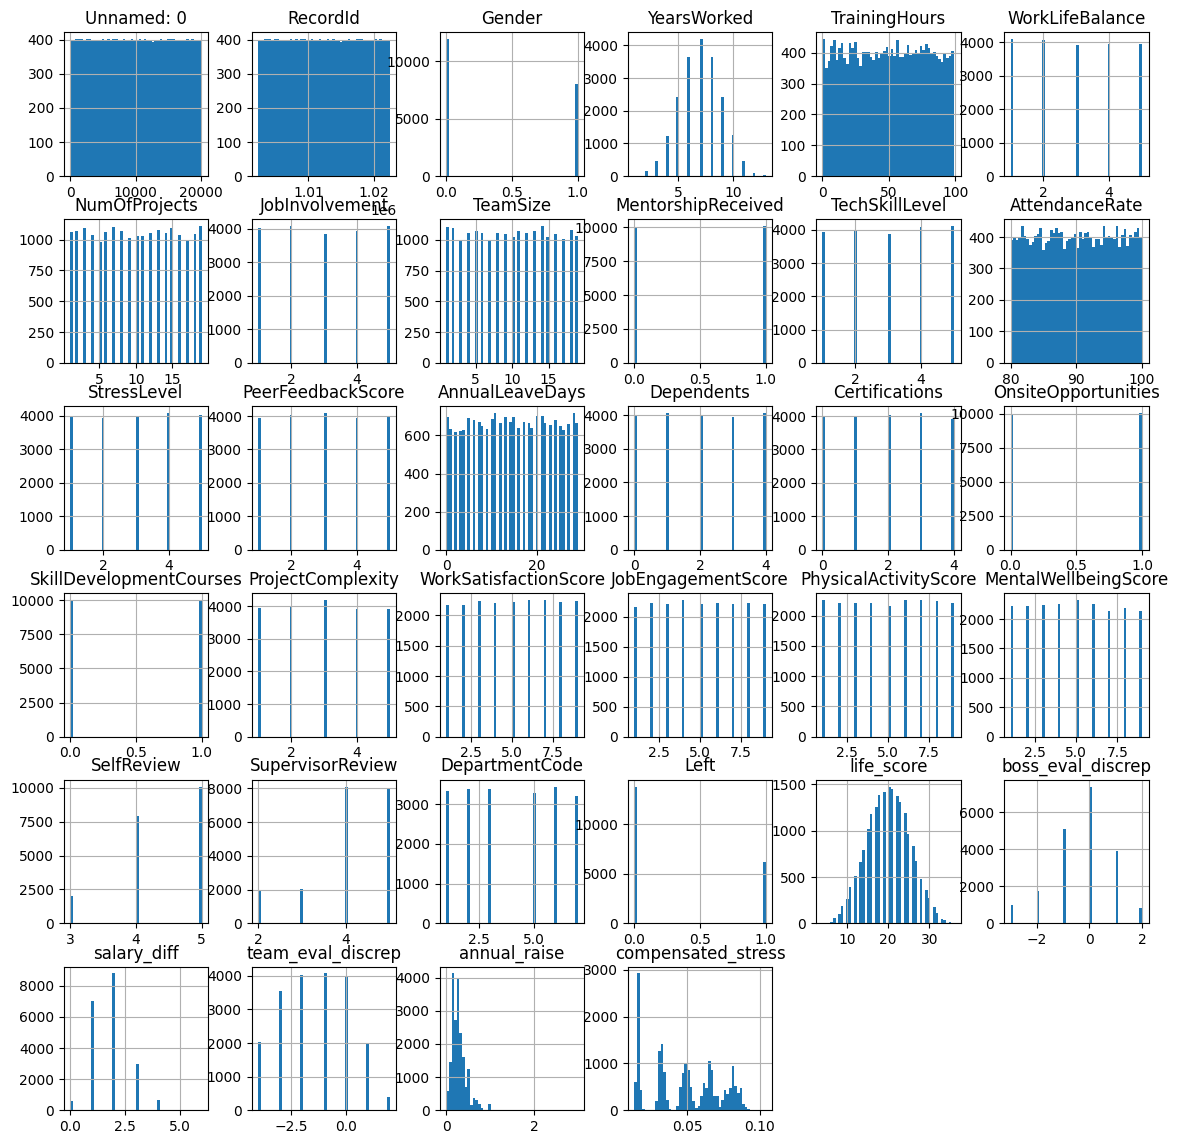

In [ ]:
top_df = df.head(20000)
top_df.hist(bins=50, figsize=(14,14))

To get a better handle on the data, we ran a histogram on the data. This helped eliminate data columns that have a minimal impact on the results.

In [ ]:
import seaborn as sns
# longest cell
top_df_nums = top_df[num_columns]
top_df_cats = top_df[cat_columns]
# sns.pairplot(top_df_cats, hue='Left')
# plt.show()

In [ ]:
#sns.pairplot(top_df_nums, hue='Left')
#plt.show()

To better understand the data, we created a set of pairplot graphs to see where leaving and not leaving seemed to be the biggest difference. We tried to find the most relevant features using this visualization technique. However, the data was inconclusive, and with the runtime being so large, we found it more advantageous to comment these out for future runtimes.

We then tried to use correlation matrices, and found more fruitful results.

Correlation Matrix - Categorical Variables


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

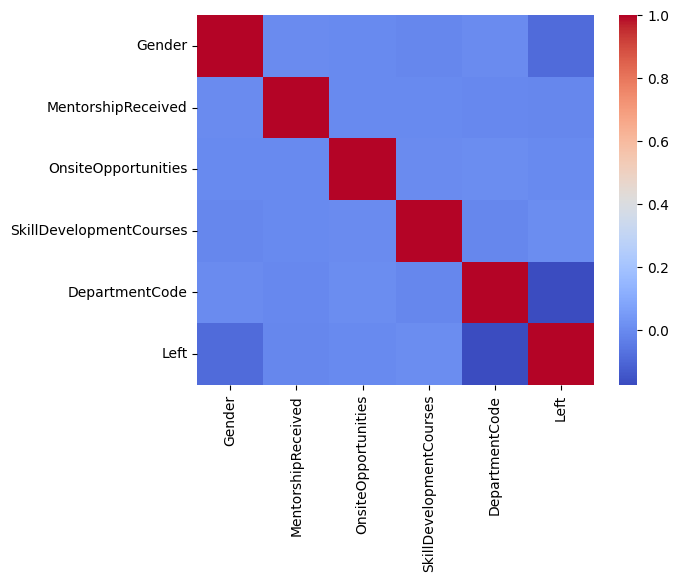

<Figure size 5000x5000 with 0 Axes>

In [ ]:
corr_matrix_catdf = top_df[['Gender', 'MentorshipReceived', 'OnsiteOpportunities',
                           'SkillDevelopmentCourses', 'DepartmentCode', 'Left']]

correlation_matrix_cat = corr_matrix_catdf.corr()
sns.heatmap(correlation_matrix_cat, annot=False, cmap='coolwarm')
print("Correlation Matrix - Categorical Variables")
plt.figure(figsize=(50,50))
plt

Correlation Matrix - Numerical Variables


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

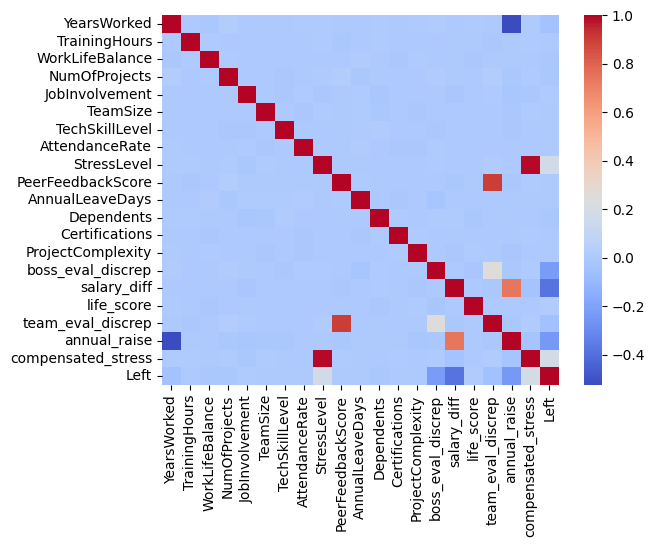

<Figure size 5000x5000 with 0 Axes>

In [ ]:
correlation_matrix = top_df_nums.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
print("Correlation Matrix - Numerical Variables")
plt.figure(figsize=(50,50))
plt

To understand what features had the biggest impact on our "Left" column, we created a heatmap to determine what features had the biggests impact. Judging by the shading returned from the correlation matrix, we found that boss_eval_discrepancy, salary_diff, and annual raise to have the biggest difference, negative or positive.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

X_num = top_df[num_columns]
X_cat = top_df[cat_columns]
X = top_df[num_columns + cat_columns]
y = top_df['Left']
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size = 0.2, random_state = 42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
num_pipe = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))])

cat_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

X_train_rev = num_pipe.fit_transform(X_train[num_columns])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

def generate_estimates_cat():
    ohes = ['Gender', 'MentorshipReceived', 'OnsiteOpportunities', 'SkillDevelopmentCourses', 'DepartmentCode']

    processing_pipeline = ColumnTransformer(transformers=[
      ('onehot', OneHotEncoder(drop='first'), ohes)
      ])

    modeling_pipeline = Pipeline([
      ('data_processing', processing_pipeline),
      ('logreg', LogisticRegression(penalty=None))])

    return modeling_pipeline.fit(X_train_cat, y_train_cat)


def generate_estimates_num():
    polys = ['boss_eval_discrep', 'salary_diff', 'life_score', 'team_eval_discrep']
    non_polys = ['YearsWorked', 'TrainingHours', 'WorkLifeBalance', 'NumOfProjects', 'JobInvolvement', 'TeamSize', 'TechSkillLevel',
               'AttendanceRate', 'StressLevel', 'PeerFeedbackScore', 'AnnualLeaveDays', 'Dependents', 'Certifications', 'ProjectComplexity']
    #ohes = ['Gender', 'MentorshipReceived', 'OnsiteOpportunities', 'SkillDevelopmentCourses', 'DepartmentCode']
    poly_pipeline = Pipeline([
        ('add_polynomials', PolynomialFeatures(3, include_bias=False)),
        ('standardize_poly', StandardScaler())]
    )

    processing_pipeline = ColumnTransformer(transformers=[
        ('poly_processing', poly_pipeline, polys),
        ('nonpoly_scaling', StandardScaler(), non_polys),
        #('onehot', OneHotEncoder(drop='first'), ohes)
        ])

    modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty=None))]
    )

    return modeling_pipeline.fit(X_train_num, y_train_num)

m = generate_estimates_num()
y_hat = m.predict(X_test_num)

g = generate_estimates_cat()
y_hat_cat = g.predict(X_test_cat)

from sklearn.metrics import classification_report
print("(num):")
print(classification_report(y_test_num, y_hat))
print("(cat):")
print(classification_report(y_test_cat, y_hat_cat))

(num):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2746
           1       0.68      0.61      0.64      1254

    accuracy                           0.79      4000
   macro avg       0.76      0.74      0.75      4000
weighted avg       0.78      0.79      0.78      4000

(cat):
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      2746
           1       0.00      0.00      0.00      1254

    accuracy                           0.69      4000
   macro avg       0.34      0.50      0.41      4000
weighted avg       0.47      0.69      0.56      4000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

We ran logistic regression based on our variables. We received the following results, with the prediction of people staying generally being better than the prediction of people leaving.
Precision: Out of predictions of those who have not left, we were right about 80% of the time. Out of the data points that should have been predicted as true, we correctly predicted about 84%.  When combining the core, we got about 82%.
We were less accurate for predicting "Left".
60% of the folks we predicted would leave, left, but we only predicted about half of the results we should have. Our f1 score was aroud 55.

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(m, X_train_num, y_train_num,scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5);
cv_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'fit_time': array([0.26906657, 0.31394744, 0.27912688, 0.25030923, 0.32197785]),
 'score_time': array([0.05025244, 0.04451704, 0.04700875, 0.04625678, 0.04700017]),
 'test_accuracy': array([0.773125 , 0.776875 , 0.7721875, 0.7896875, 0.7846875]),
 'test_recall': array([0.57905337, 0.54884189, 0.58106747, 0.6082578 , 0.61368209]),
 'test_precision': array([0.65118913, 0.67200986, 0.64831461, 0.68018018, 0.66666667]),
 'test_f1_macro': array([0.72626447, 0.72443019, 0.72573076, 0.74664242, 0.74283005]),
 'test_roc_auc': array([0.84026655, 0.83826067, 0.83105207, 0.84549527, 0.8466342 ])}

In [ ]:
cv_results_cat = cross_validate(g, X_train_cat, y_train_cat,scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5);
cv_results_cat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

{'fit_time': array([0.04982471, 0.05501723, 0.05120349, 0.05434179, 0.06038404]),
 'score_time': array([0.03960371, 0.04622483, 0.049371  , 0.05003762, 0.0447135 ]),
 'test_accuracy': array([0.6896875, 0.6896875, 0.6896875, 0.6896875, 0.689375 ]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_f1_macro': array([0.40817459, 0.40817459, 0.40817459, 0.40817459, 0.40806511]),
 'test_roc_auc': array([0.62988724, 0.65308998, 0.62773511, 0.62716542, 0.62989702])}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
combo_process_pipe = ColumnTransformer(transformers=[
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
    ])

combo_pipe = Pipeline([
    ('data_processing', combo_process_pipe),
    ('classifier', RandomForestClassifier(random_state=42))])

combo_pipe.fit(X_train, y_train)
y_train_pred = combo_pipe.predict(X_train)
#training_accuracy = accuracy_score(y_train, y_train_pred)
# get accuracy score for test set
combo_pipe.fit(X_test, y_test)
y_test_pred = combo_pipe.predict(X_test)
#testing_accuracy = accuracy_score(y_test, y_test_pred)

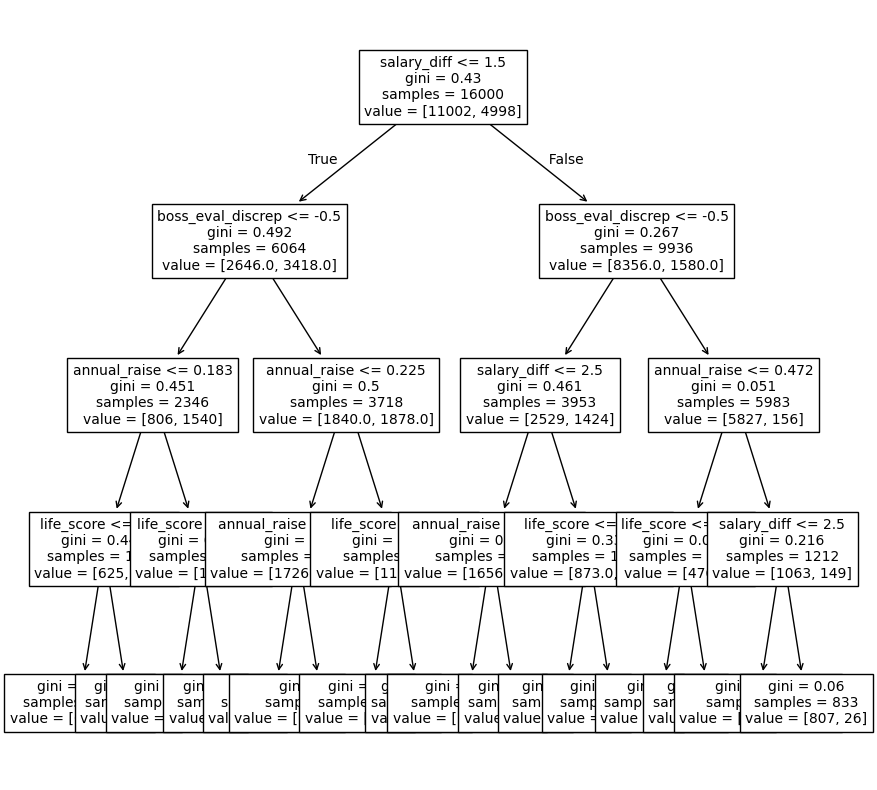

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
# dfFeatures = [x for x in Xs.columns if x != 'Left']
left_var = np.where(top_df_nums['Left'] == 1, 1, 0)
polys = ['boss_eval_discrep', 'salary_diff', 'life_score', 'team_eval_discrep', 'annual_raise']
X_train, X_test, y_train, y_test = train_test_split(top_df_nums[polys], left_var, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, random_state=1)
tree_model.fit(X_train, y_train)

from sklearn import tree
feature_names = ['boss_eval_discrep', 'salary_diff', 'life_score', 'team_eval_discrep', 'annual_raise']

plt.figure(figsize=(10,10))
tree.plot_tree(tree_model, feature_names=feature_names, fontsize=10)
plt.show()


For our next model, we tried using a decision tree.

In [ ]:
print(f'Training accuracy: {tree_model.score(X_train, y_train):.2f}')
print(f'Test accuracy: {tree_model.score(X_test, y_test):.2f}')

Training accuracy: 0.74
Test accuracy: 0.74


Generally, we got pretty good results with the decision tree approach. We we about 75% accurate.

In [ ]:
tree_model.predict_proba(X_test)[:5, :]

array([[0.33476165, 0.66523835],
       [0.51791427, 0.48208573],
       [0.82608696, 0.17391304],
       [0.51791427, 0.48208573],
       [0.33476165, 0.66523835]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

polys = ['boss_eval_discrep', 'salary_diff', 'life_score', 'team_eval_discrep', 'annual_raise']
ohes = ['Left']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), polys)]
)

rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10, 50, 100],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample']
               # 'rf__max_samples': [1000, 2000, 5000]
              }]


Finally, we tried a random forest approach. Because we were limited in processing power, we decided to limit our random forest to the 4 variables that seemed to make the most of a difference in earlier analysis.

In [ ]:
rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='f1', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['boss_eval_discrep',
                                                   'salary_diff', 'life_score',
                                                   'team_eval_discrep',
                                                   'annual_raise'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=8))])

In [ ]:
best_params = rf_results.best_params_
best_model = rf_results.best_estimator_
print(best_params)
print(best_model)

{'rf__class_weight': 'balanced', 'rf__max_depth': 8, 'rf__n_estimators': 100}
Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['boss_eval_discrep',
                                                   'salary_diff', 'life_score',
                                                   'team_eval_discrep',
                                                   'annual_raise'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=8))])


In [ ]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      2778
           1       0.50      0.92      0.65      1222

    accuracy                           0.70      4000
   macro avg       0.73      0.76      0.69      4000
weighted avg       0.81      0.70      0.71      4000



Our results were really good for precisely predicting results for people who stayed. But again, we were only about 50% accurate at finding people who left.

In [ ]:
# Cross Validation
rf_results.best_score_

rf_results.score(X_test, y_test)


0.6524002313475997

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_validate(rf_results, X_train, y_train, scoring=[
    'accuracy',
    'recall',
    'precision',
    'f1_macro',
    'roc_auc'], cv=5)
cv_results

{'fit_time': array([78.31660748, 77.88139343, 79.1821394 , 78.25235248, 78.73753905]),
 'score_time': array([0.11062217, 0.0644803 , 0.08226562, 0.04345322, 0.09244418]),
 'test_accuracy': array([0.715    , 0.7015625, 0.7003125, 0.7078125, 0.71125  ]),
 'test_recall': array([0.92692693, 0.91891892, 0.92      , 0.91      , 0.915     ]),
 'test_precision': array([0.52464589, 0.51227679, 0.51139522, 0.51851852, 0.52166477]),
 'test_f1_macro': array([0.70960917, 0.69660625, 0.69553136, 0.70205064, 0.7055298 ]),
 'test_roc_auc': array([0.82855595, 0.81335265, 0.82291591, 0.82386841, 0.82020341])}

Our cross validation score of our random forest indicated that our tests were about equally accurate across our data set. There wasn't any big discrepancies between different sections of our data. a